## Background
Airbnb has transformed the travel and accommodation industry by offering diverse options ranging from private rooms to entire homes. Hosts design their listings around key factors such as location, pricing, and availability to attract guests. Despite its success, the performance of Airbnb listings varies significantly, with some achieving higher visibility, more reviews, or greater revenues than others.

In Bangkok, the Airbnb market is particularly dynamic, influenced by the city’s role as a global tourist hub. Traveler preferences and host strategies drive this ever-evolving market, creating opportunities and challenges for both parties.

## Problem Formulation
Despite Airbnb’s success, hosts in Bangkok face many challenges when trying to optimize their listings. Key questions they grapple with include:

- **Where’s the Action?**: How are listings spread across Bangkok’s neighborhoods? Are there hidden gems that could offer growth opportunities for hosts?
- **What’s Driving Prices?**: What makes one listing cost more than another? How do room types and neighborhood vibes shape what travelers are willing to pay?
- **Supply vs. Demand**: Are hosts offering the right mix of room types and minimum stay options to match what travelers actually want?
- **Minimum Stays Sweet Spot**: How do minimum stay policies differ across neighborhoods? What’s the sweet spot for short-term (Daily Stay), mid-term (Weekly Stay), and long-term (Monthly Stay) accommodations?
- **Leveling Up Airbnb**: What can Airbnb do to fine-tune its platform, supercharge host performance, and delight travelers?

## Analysis Purposes
This analysis aims to uncover insights into Airbnb’s market performance in Bangkok by examining listing distribution, pricing dynamics, traveler engagement, and minimum stay policies. The goal is to provide actionable recommendations to align host strategies with traveler preferences, optimize pricing and stay policies, and guide Airbnb's product and marketing teams in expanding market opportunities and enhancing the platform’s competitiveness. By addressing these objectives, the analysis serves as a roadmap for improving Airbnb’s operations in Bangkok.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# DATA UNDERSTANDING

In [2]:
# load dataset
data = pd.read_csv("Airbnb Listings Bangkok.csv")
# display few first row
data.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

In [3]:
data.shape
# view data dimension
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 15854 rows and 17 columns.


In [4]:
#view data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

The dataset contains 15,854 rows and 17 columns, with the following key attributes:

- Quantitative Variables: Price, Minimum Nights, Number of Reviews, Reviews Per Month, etc.
- Categorical Variables: Room Type, Neighborhood, Host Name, etc.
- Temporal Variable: Last Review (date field).

In [5]:
def detailed_unique_data(data):
    data_unique = pd.DataFrame({
        'Columns': data.columns,
        'Unique Count': [data[col].nunique() for col in data.columns],
        'First 5 Unique Values': [data[col].unique()[:5] for col in data.columns],
        'Data Type': [data[col].dtype for col in data.columns]
    })
    return data_unique


unique_data_summary = detailed_unique_data(data)
pd.set_option('display.max_colwidth', None)
display(unique_data_summary)

Columns  Unique Count  \
0                       Unnamed: 0         15854   
1                               id         15854   
2                             name         14794   
3                          host_id          6659   
4                        host_name          5312   
5                    neighbourhood            50   
6                         latitude          9606   
7                        longitude         10224   
8                        room_type             4   
9                            price          3040   
10                  minimum_nights            86   
11               number_of_reviews           298   
12                     last_review          1669   
13               reviews_per_month           513   
14  calculated_host_listings_count            50   
15                availability_365           366   
16           number_of_reviews_ltm            85   

                                                                                                                                                               First 5 Unique Values  \
0                                                                                                                                                                    [0, 1, 2, 3, 4]   
1                                                                                                                                               [27934, 27979, 28745, 35780, 941865]   
2   [Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint]   
3                                                                                                                                           [120437, 120541, 123784, 153730, 610315]   
4                                                                                                                                          [Nuttee, Emy, Familyroom, Sirilak, Kasem]   
5                                                                                                                        [Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen]   
6                                                                                                                                 [13.75983, 13.66818, 13.75232, 13.78823, 13.76872]   
7                                                                                                                            [100.54134, 100.61674, 100.62402, 100.57256, 100.63338]   
8                                                                                                                           [Entire home/apt, Private room, Hotel room, Shared room]   
9                                                                                                                                                      [1905, 1316, 800, 1286, 1000]   
10                                                                                                                                                                [3, 1, 60, 7, 250]   
11                                                                                                                                                                 [65, 0, 2, 19, 1]   
12                                                                                                                             [2020-01-06, nan, 2022-04-01, 2017-08-03, 2014-02-03]   
13                                                                                                                                                      [0.5, nan, 0.03, 0.17, 0.01]   
14                                                                                                                                                                 [2, 1, 3, 41, 10]   
15                                                                                                                                                

Unique Values:
- id: Unique for every row, serving as the primary identifier.
- host_id: Indicates 6,659 unique hosts, implying some hosts have multiple listings.
- neighbourhood and room_type: Limited categories, suitable for categorical analysis.
- Unnamed:0 : Unnecessary indexing

In [6]:
print('Descriptive Stats for Number')
display(data.describe(include='number'))

print('Descriptive Stats for Object')
display(data.describe(include='object'))

Descriptive Stats for Number


Unnamed: 0            id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
std     4576.799919  2.946015e+17  1.318726e+08      0.043040      0.050911   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.250000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.500000  3.503734e+07  1.224556e+08     13.738490    100.561415   
75%    11889.750000  5.256154e+07  2.390547e+08     13.759497    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       10064.000000   
mean   3.217704e+03       15.292355          16.654157           0.813145   
std    2.497212e+04       50.815020          40.613331           1.090196   
min    0.000000e+00        1.000000           0.000000           0.010000   
25%    9.000000e+02        1.000000           0.000000           0.120000   
50%    1.429000e+03        1.000000           2.000000           0.435000   
75%    2.429000e+03        7.000000          13.000000           1.060000   
max    1.100000e+06     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

Descriptive Stats for Object


name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

Insight: 
1. Outliers in Price and Minimum Nights:

        Extremely high values in price and minimum_nights could skew analyses and need treatment (e.g., filtering or capping).
2. Zero Values:

        Listings with price = 0 or availability_365 = 0 may require further inspection to confirm their validity or remove them.
3. Inactive Listings:

        Many listings lack reviews (reviews_per_month = 0), which could indicate inactivity or newness.
4. Professional Hosts:
      
        Some hosts (e.g., "Curry") manage multiple listings, which may influence insights about individual hosts.

In [7]:
# Check for missing values in each column
missing_values = data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values
missing_percentage = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)

# Combine
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
display(missing_data)

Missing Count  Missing Percentage
reviews_per_month                        5790           36.520752
last_review                              5790           36.520752
name                                        8            0.050460
host_name                                   1            0.006308
Unnamed: 0                                  0            0.000000
neighbourhood                               0            0.000000
latitude                                    0            0.000000
id                                          0            0.000000
host_id                                     0            0.000000
room_type                                   0            0.000000
longitude                                   0            0.000000
minimum_nights                              0            0.000000
price                                       0            0.000000
number_of_reviews                           0            0.000000
calculated_host_listings_count              0            0.000000
availability_365                            0            0.000000
number_of_reviews_ltm                       0            0.000000

Insights from Missing Data
- reviews_per_month and last_review:

        Both columns have 36.5% missing values. This likely corresponds to listings with zero reviews.
Listings with missing values here might represent inactive or unpopular properties.


- name and host_name:

        Minimal missing data (~0.05% and 0.006%, respectively). This is negligible and does not heavily impact analysis.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

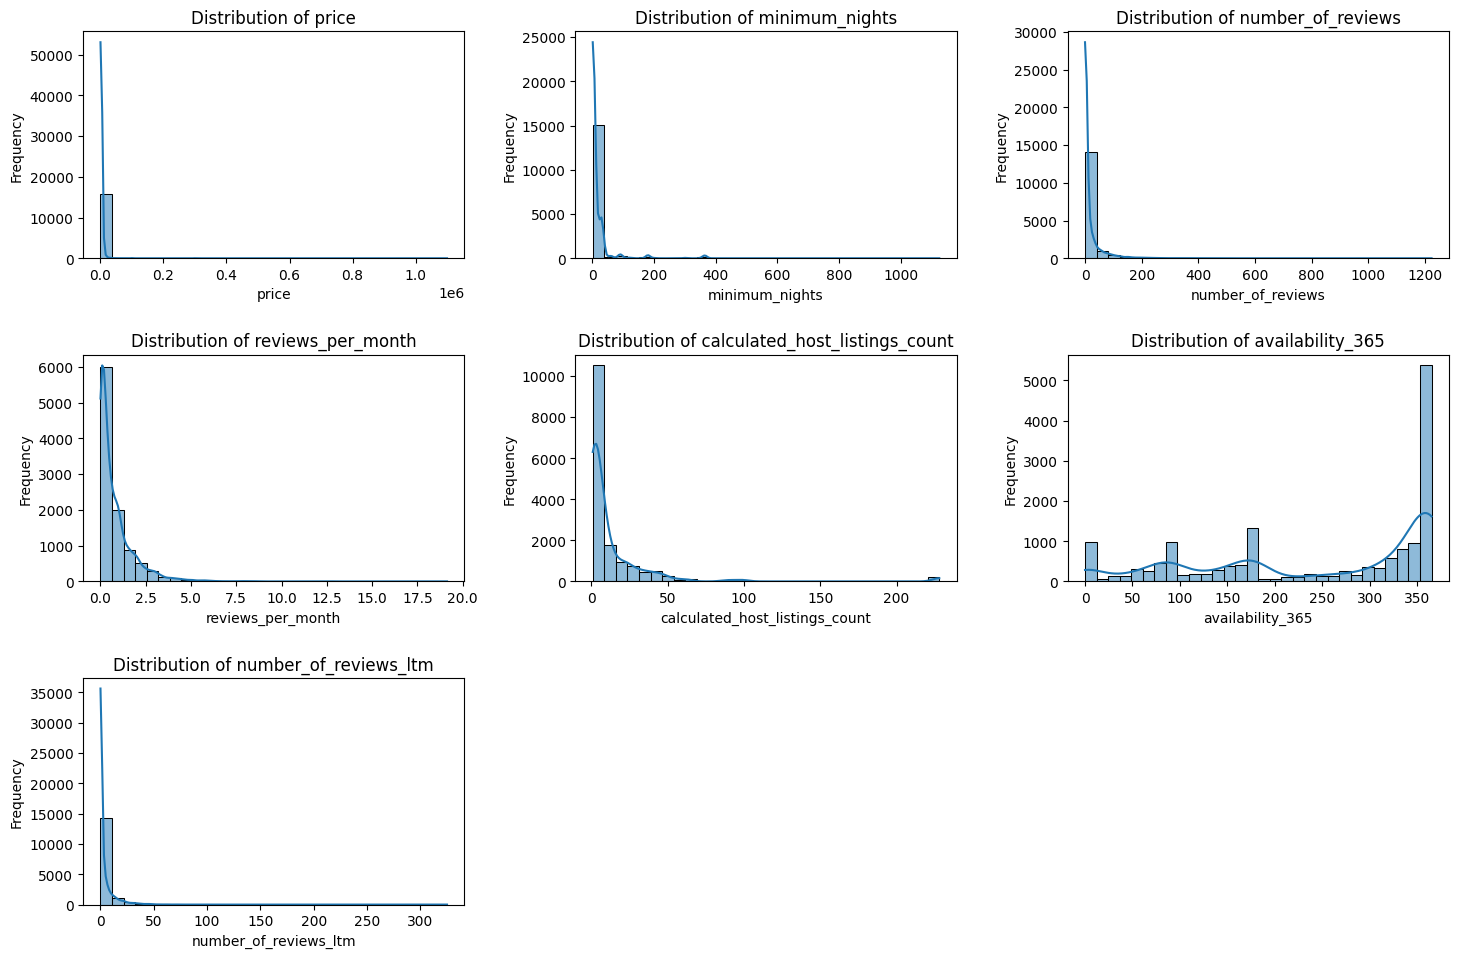

In [9]:
# Plot histograms for numerical columns
numerical_columns = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm'] 
num_plots = len(numerical_columns)
cols = 3
rows = (num_plots + cols - 1) // cols


fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize to fit 3x3
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.2)
plt.show()

1. Insights from Numerical Data Distributions
- Price:

        The price distribution is highly skewed with extreme outliers. 
        The majority of listings fall within a lower price range, suggesting affordability as a key market trend. Extreme outliers may need capping during data preprocessing.
- Minimum Nights:

        Highly skewed as well, with a maximum of 1,125 nights. Most listings have a short minimum stay, making them appealing to short-term travelers. 
        Outliers in minimum_nights likely represent hosts trying to discourage certain bookings (e.g., short-term guests).
- Reviews:

        number_of_reviews and reviews_per_month have exponential-like distributions, with the majority of properties receiving few reviews. 
        A small fraction of listings are very popular.
- Availability (availability_365):

        Most listings are either fully available (365 days) or have low availability. This might reflect seasonal hosts or those actively seeking full-year bookings.


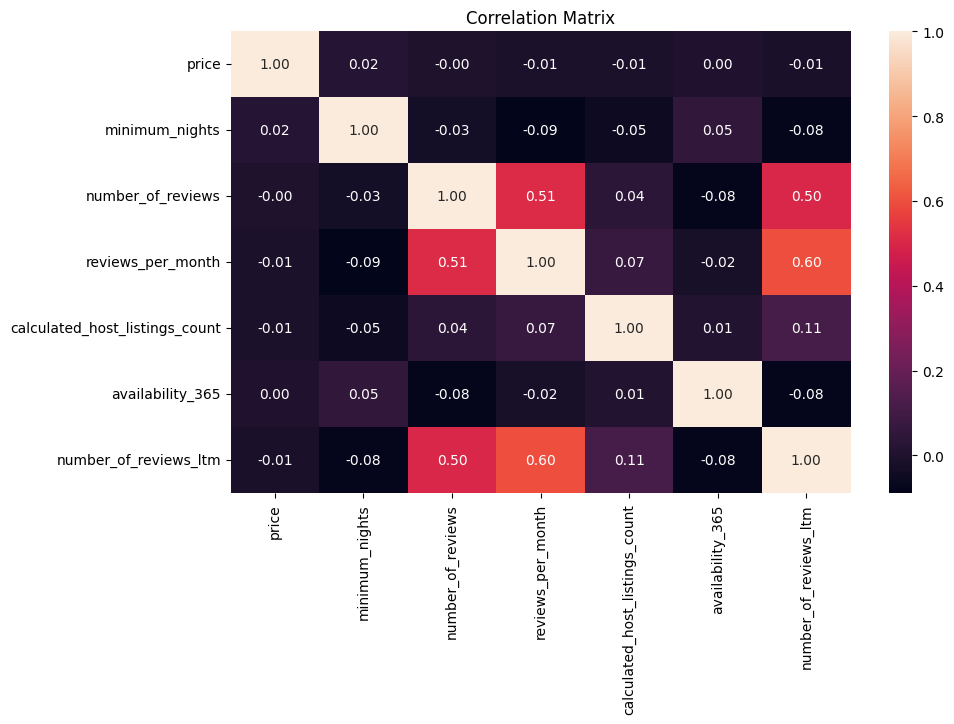

In [10]:
# Calculate correlations
correlation_matrix = data[numerical_columns].corr()

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation Insights
1. Weak Correlations:

        Most variables have weak correlations with each other (values near 0), which might indicate noise or irrelevant data.
        For instance, price shows almost no correlation with other variables (e.g., reviews_per_month, availability_365, etc.).

2. Strong Correlations:

        reviews_per_month and number_of_reviews_ltm (last 12 months) have a strong positive correlation (0.60). 
        This makes sense as both metrics likely track recent review activity.
        number_of_reviews and reviews_per_month also have a moderately strong correlation (0.51), indicating potential redundancy between these variables.

3. Potential Issues:

        Variables like calculated_host_listings_count and availability_365 have very low correlations with others, 
        which might indicate limited impact on the overall analysis.
        Outliers or extreme values in variables like price or minimum_nights might distort the correlations.

# DATA CLEANSING

In [11]:
df = data.copy()

## Handling Data Type Error

In [12]:
df = df.drop(columns=['Unnamed: 0'])
df['host_id'] = df['host_id'].astype(str)
df['id'] = df['id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df['room_type'] = df['room_type'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')


## Handling Missing Value

In [13]:
print("Missing Values Overview:")
display(missing_data)


Missing Values Overview:


Missing Count  Missing Percentage
reviews_per_month                        5790           36.520752
last_review                              5790           36.520752
name                                        8            0.050460
host_name                                   1            0.006308
Unnamed: 0                                  0            0.000000
neighbourhood                               0            0.000000
latitude                                    0            0.000000
id                                          0            0.000000
host_id                                     0            0.000000
room_type                                   0            0.000000
longitude                                   0            0.000000
minimum_nights                              0            0.000000
price                                       0            0.000000
number_of_reviews                           0            0.000000
calculated_host_listings_count              0            0.000000
availability_365                            0            0.000000
number_of_reviews_ltm                       0            0.000000

In [14]:
# Drop 
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['host_name'], inplace=True)

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

The reasoning for dropping these rows are:
1. Listings without names likely cannot function effectively in the platform’s search and browsing system. Users cannot search for or identify these listings, making them practically invalid.
2. Low missing count, Dropping them would have minimal impact on the dataset’s size and representativeness.


In [16]:
# Fill
df['reviews_per_month'].fillna(0, inplace=True)

In [17]:
df['last_review'].fillna("Not Reviewed", inplace=True)

The reasoning not dropping these rows are:
1. This column represents how often a listing receives reviews. If it's missing, it likely means the listing has never received any reviews.
2. Dropping them would result in losing 36.52% of the dataset, which is a significant amount of data, these listings are still valuable for analysis, even if they haven't received reviews.

In [18]:
warnings.filterwarnings("ignore", category=UserWarning) 

In [19]:
from scipy import stats

# Saphiro Wilk Test
statistic, p_value = stats.shapiro(df['price'])

# Test Result
alpha = 0.05
print("Shapiro-Wilk Test for Normality:")
print("Statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("The Distribution is normal")
else:
    print("The Distribution is not normal")

Shapiro-Wilk Test for Normality:
Statistic: 0.0444298390021719
p-value: 1.4979188141916016e-127
The Distribution is not normal


In [20]:
df['price'] = df['price'].replace(0, df[df['price'] != 0]['price'].median())

The reasoning:
after using saphiro wilk hypothesis testing, the data distibution of price is not normal so I replaced the 0 value in column price with median

In [21]:
data.shape[0]-df.shape[0]

9

## Handling Outliers

Columns to Assess for Outliers
From our earlier data exploration, potential columns with numeric outliers include:

1. price: Listings with unusually high/low prices.
2. minimum_nights: Unreasonably high booking durations (e.g., hundreds of nights).
3. number_of_reviews: Listings with an extreme number of reviews.
4. reviews_per_month: Extremely high monthly review counts.
5. calculated_host_listings_count: Hosts with an unusually large number of listings.

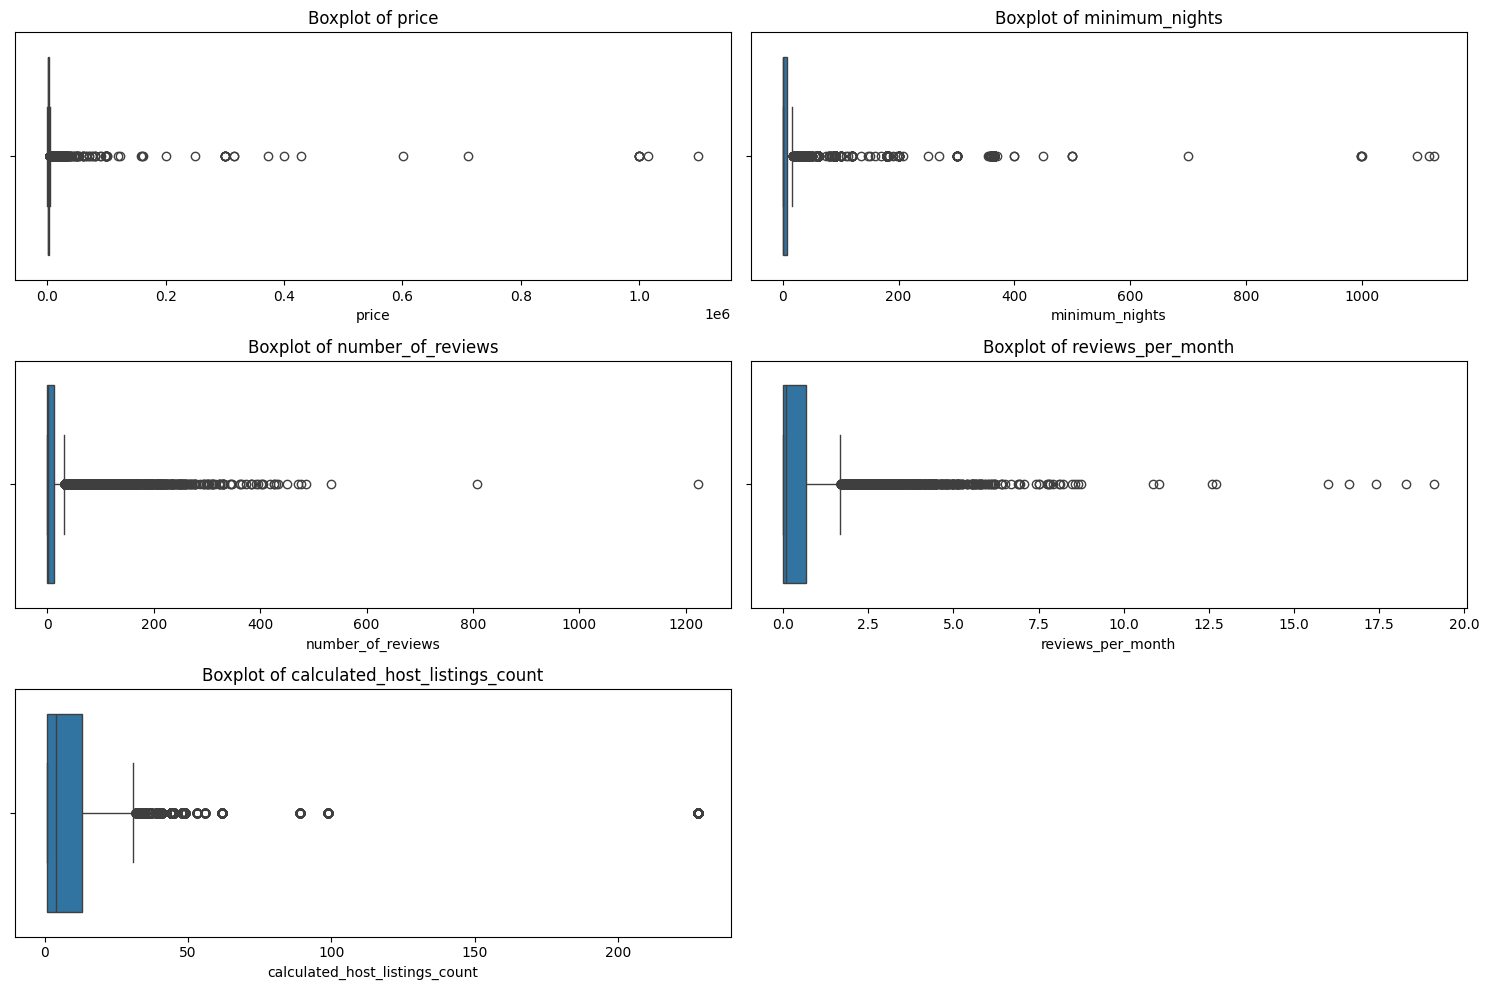

In [22]:
# List of columns to visualize
columns_to_visualize = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

# boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

1. Price: Extreme values, with some listings having prices well above 1,000,000. These are likely errors or represent highly luxurious properties.
2. Minimum Nights: Some listings have excessively high values (e.g., over 1,000). This is uncommon, as most users book stays for days or weeks, not years.
3. Number of Reviews: A few listings have over 1,000 reviews, which could indicate very popular properties, but these are rare.
4. Reviews per Month: Outliers include listings with more than 10–15 reviews per month, which might suggest highly frequented listings or data anomalies.
5. Calculated Host Listings Count: Hosts with over 100–200 listings are significant outliers. These might be corporate accounts rather than individual hosts.

In [23]:
def detect_outliers(sel_data, sel_column):
    # IQR Method
    Q1 = sel_data[sel_column].quantile(0.25)
    Q3 = sel_data[sel_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR
    outliers_IQR = sel_data[(sel_data[sel_column] < lower_bound_iqr) | (sel_data[sel_column] > upper_bound_iqr)]

    # Percentile Method
    lower_bound_percentile = sel_data[sel_column].quantile(0.05)
    upper_bound_percentile = sel_data[sel_column].quantile(0.95)
    outliers_percentile = sel_data[(sel_data[sel_column] < lower_bound_percentile) | (sel_data[sel_column] > upper_bound_percentile)]

    # Return results
    return {
        "Column": sel_column,
        "IQR_Lower": lower_bound_iqr,
        "IQR_Upper": upper_bound_iqr,
        "IQR_Outliers": len(outliers_IQR),
        "Percentile_Lower": lower_bound_percentile,
        "Percentile_Upper": upper_bound_percentile,
        "Percentile_Outliers": len(outliers_percentile)
    }

# Collect results for all columns
results = []
for col in ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']:
    result = detect_outliers(df, col)
    results.append(result)

# Create a DataFrame for better visualization
outliers_df = pd.DataFrame(results)
outliers_df

Column  IQR_Lower  IQR_Upper  IQR_Outliers  \
0                           price  -1393.500   4722.500          1402   
1                  minimum_nights     -8.000     16.000          3168   
2               number_of_reviews    -19.500     32.500          2240   
3               reviews_per_month     -1.005      1.675          1471   
4  calculated_host_listings_count    -17.000     31.000          1832   

   Percentile_Lower  Percentile_Upper  Percentile_Outliers  
0             500.0           6768.20                 1545  
1               1.0             55.00                  791  
2               0.0             87.00                  776  
3               0.0              2.31                  792  
4               1.0             48.00                  747

For the price column, having the Upper bound of the IQR mothod at 4722 baht, it's pretty robust of a method to be applied to this Data. The IQR Method will be excluding many luxurious listings that could cause an impact to the future analysis, so the final decision is to cap the data using the 95th percentile with an Upper bound at 6807 baht.

In [24]:
# Capping outliers at the 1th and 99th percentiles
cap_columns = ['price', 'number_of_reviews', 'reviews_per_month']
for col in cap_columns:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Dropping rows with extreme values for specific columns
drop_columns = {
    'minimum_nights': 365,  # Drop rows where minimum_nights > 365
    'calculated_host_listings_count': 100  # Drop rows where host listings > 100
}
for col, limit in drop_columns.items():
    df = df[df[col] <= limit]

df.reset_index(drop=True, inplace=True)

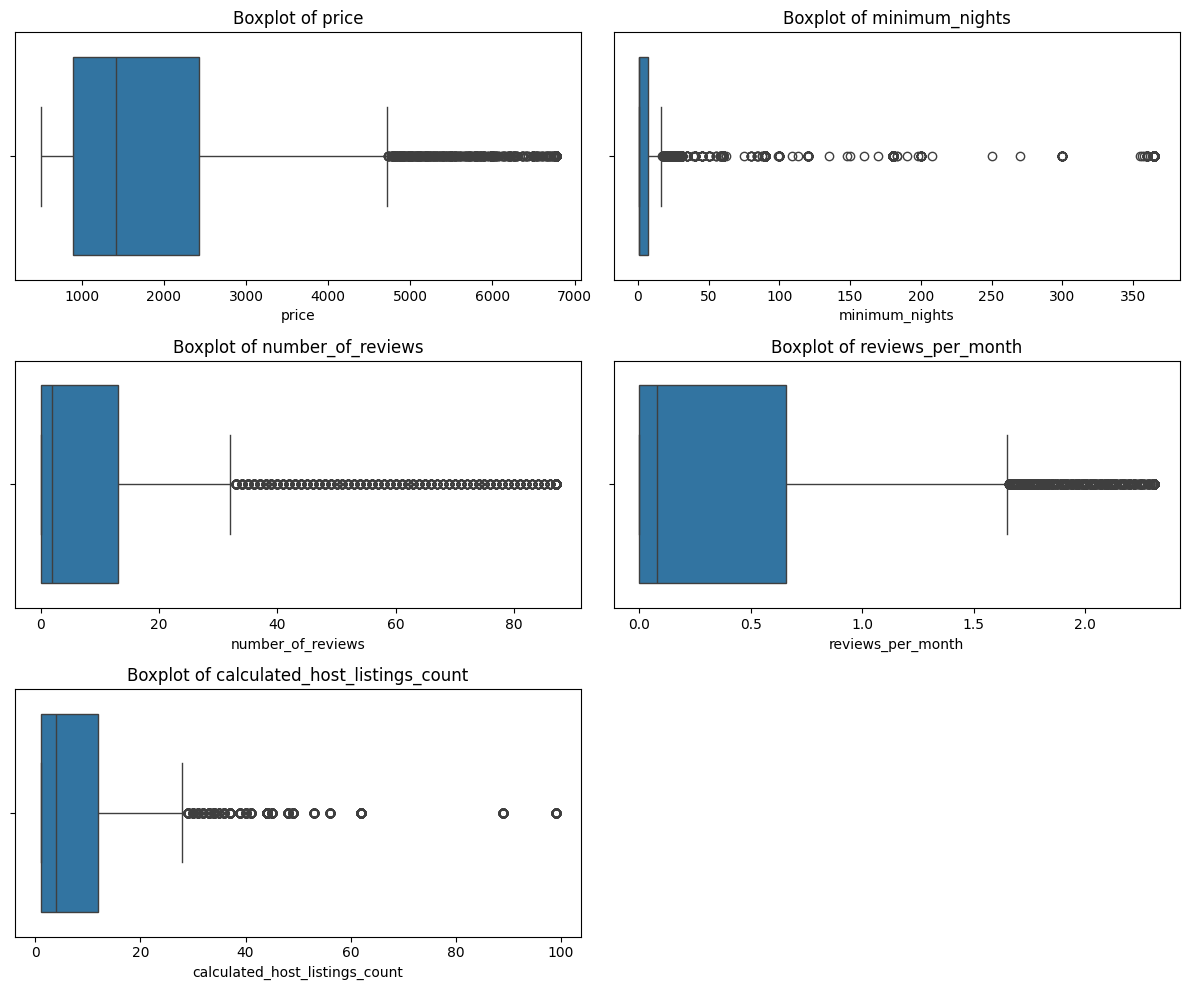

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
columns_to_plot = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Boxplot of {col}')

# Remove the empty subplot
fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

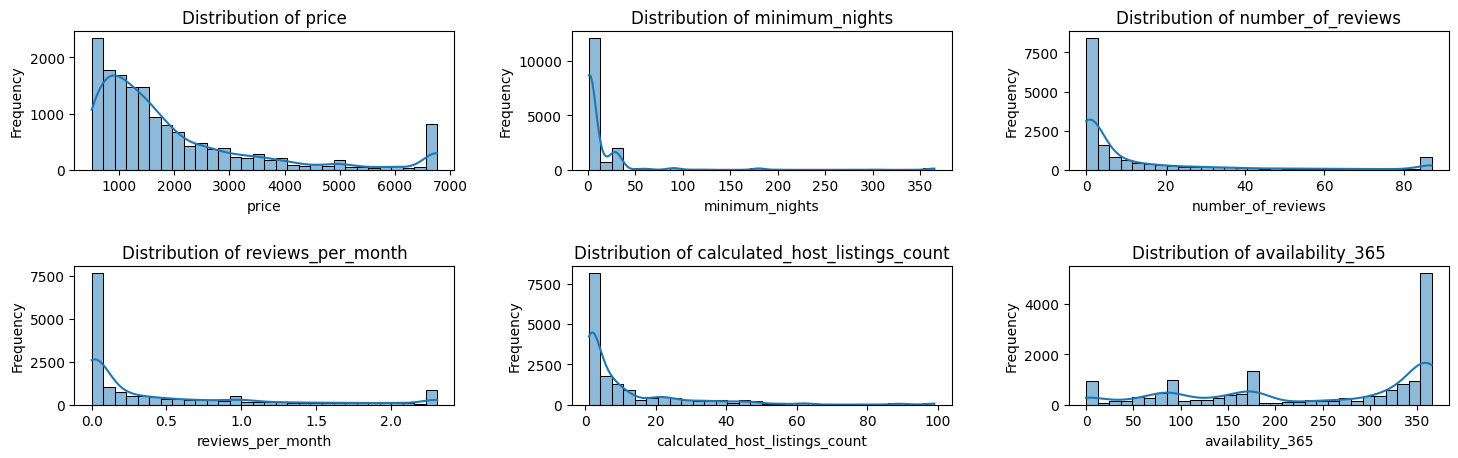

In [26]:
numerical_columns = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'] 
num_plots = len(numerical_columns)
cols = 3
rows = (num_plots + cols - 1) // cols


fig, axes = plt.subplots(rows, cols, figsize=(15, 5)) 
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.2)
plt.show()

In [27]:
# Check for fully duplicated rows
full_duplicates = df[df.duplicated()]
print(f"Number of fully duplicated rows: {len(full_duplicates)}")

# Check for partially duplicated rows based on specific columns
partial_duplicates = df[df.duplicated(subset=['name', 'host_id', 'neighbourhood', 'latitude', 'longitude'])]
print(f"Number of partially duplicated rows: {len(partial_duplicates)}")

Number of fully duplicated rows: 0
Number of partially duplicated rows: 42


In [28]:
# Group by key columns to find duplicates
duplicate_listings = (
    df[df.duplicated(subset=['name', 'host_id', 'neighbourhood', 'latitude', 'longitude'], keep=False)]
    .groupby(['name', 'host_id', 'neighbourhood', 'latitude', 'longitude'])
    .size()
    .reset_index(name='count')
)

# Filter for groups where the count is greater than 1
duplicate_listings = duplicate_listings[duplicate_listings['count'] > 1]

print(f"Number of duplicate groups: {len(duplicate_listings)}")
print("Sample of duplicate groups:")
duplicate_listings

Number of duplicate groups: 38
Sample of duplicate groups:


name    host_id  \
1112684      15days!New!Bang Phlat MRT 600m/swiming pool/gym   52161947   
2568064          2 Beds Thong lor/Ekkamai/Nana/Swimming pool  485413319   
3853526    50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym  472715937   
3853556    50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym  472715937   
5469280               Budget Hotel in Center of Bangkok @HAP  476157531   
7119372    Cozy Room/Private/(2pp)/BTS7Min/Silom/Sathorn/New   60049967   
7999580              DOUBLE AIRPORT 10MIN, NICE VIEW ROOFTOP  273701410   
8955300       Family Friendly Condo with Baby amenities提供婴儿床   12464021   
11145228                            Family Room for 4 People  340188343   
13338259  Great price, 100m Short walk to BTS, Why stay far?   95548084   
13805561   Hostel (4-Bed Mixed Dorm/wifi/breakfast/Ratchada)  253587319   
15009505     Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   20133201   
15634218     Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9  344327171   
17713180       Luxury Room near BTS Bangchak with Pool & Gym    8444643   
19252426                           NA BANGLAMPOO GUEST HOUSE   87704107   
20381267  New spacious 2BR 3PPL with pool&gym Silom &Sathorn  480415786   
21499611  New! Gateway/ Bangkok University 1BR 2PPL near BTS  314945555   
21980141  New! Gateway/ Bangkok University 1BR 2PPL near BTS   52161947   
22421846   ONLY 10 min walk BTS Ari / BAANNUENG @ari5[Suite]  183921210   
25127630          Private Room in Sukhumvit: BTS Phrom Phong    8426774   
25977810    Sale! BTS On Nut/Sukhumvit 87/loft/pool/gym/wifi  314945555   
26947467             Sathon Luxury 2 br/China Town/Icon Siam   20133201   
27283817             Sathon Luxury 2 br/China Town/Icon Siam  264864968   
27572117             Sathon Luxury 2 br/China Town/Icon Siam  344327171   
28917517             Sathon Luxury Loft/China Town/Icon Siam  276781306   
30615696                                     Silvio's Bistro   41512313   
32070971                Studio for 2PAX: 1-Min from BTS Nana    3773805   
33979354     Studio with Zen garden view (30sqm), LUXX Silom   68154488   
34617561     Studio,5min walk Skytrain Asoke,WiFi,Terminal21   24021888   
36107111    Sukhumvit, 5 min walk to Sky Train Asoke Station   24021888   
38192525                                 Thaya Hotel Bangkok  475721302   
38933847                                  The Lux Ladprao 10  214932677   
40423397                                  The Lux Ladpraw 10  214932677   
41883885              Vintage LOFT SUITE in Bangkok old town  214236911   
43713575      White House Hostel Deluxe Room Shared Bathroom  266898220   
46144329                                              small1   97598307   
46455767   曼谷市中心loft公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达  219984842   
47993367   曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费  227771817   

         neighbourhood   latitude   longitude  count  
1112684     Bang Phlat  13.788938  100.503600      2  
2568064    Khlong Toei  13.722669  100.576863      2  
3853526       Bang Sue  13.828505  100.527433      2  
3853556       Bang Sue  13.828505  100.527433      2  
5469280         Sathon  13.720197  100.548159      2  
7119372       Bang Rak  13.723330  100.523310      2  
7999580    Lat Krabang  13.719430  100.753990      2  
8955300    Huai Khwang  13.760440  100.569440      2  
11145228       Vadhana  13.740168  100.556320      2  
13338259   Parthum Wan  13.743800  100.549670      2  
13805561     Din Daeng  13.786360  100.570200      2  
15009505   Huai Khwang  13.756184  100.568269      2  
15634218   Huai Khwang  13.757097  100.568486      2  
17713180  Phra Khanong  13.698500  100.610100      2  
19252426   Phra Nakhon  13.762790  100.497900      2  
20381267      Bang Rak  13.731819  100.526120      2  
21499611   Khlong Toei  13.716669  100.584967      3  
21980141   Khlong Toei  13.716847  100.584781      2  
22421846    Phaya Thai  13.780780  100.539720      2  
25127630       Vadhana  13.729

In [29]:
df.drop_duplicates(subset=['name', 'host_id', 'neighbourhood', 'latitude', 'longitude'], keep='first', inplace=True)

In [30]:
print(f"Remaining duplicates: {df.duplicated(subset=['name', 'host_id', 'neighbourhood', 'latitude', 'longitude']).sum()}")

Remaining duplicates: 0


In [31]:
df['high_review_frequency'] = df['reviews_per_month'] > 1

# Host Activity Level
df['host_activity_level'] = pd.cut(
    df['calculated_host_listings_count'], 
    bins=[0, 1, 10, 50, float('inf')], 
    labels=['Single Listing', 'Small Host', 'Medium Host', 'Large Host']
)

# Occupancy Ratio
df['occupancy_ratio'] = (365 - df['availability_365']) / 365

In [32]:
cleaned_file_name = "Airbnb Listings Bangkok (Cleaned).csv"
df.to_csv(cleaned_file_name, index=False)

In [33]:
print('Shape before cleansing: ', data.shape)
print('Shape after cleansing: ',df.shape)
print(f'{(data.shape[0]) - (df.shape[0])} rows were removed or')
print(f'{round(((1 - (df.shape[0]/data.shape[0]))*100), 2)}% of the entries were removed.')

Shape before cleansing:  (15854, 17)
Shape after cleansing:  (15560, 19)
294 rows were removed or
1.85% of the entries were removed.


In [34]:
df.shape

(15560, 19)

In [35]:
df.head()

id                                            name host_id   host_name  \
0   27934                 Nice room with superb city view  120437      Nuttee   
1   27979                  Easy going landlord,easy place  120541         Emy   
2   28745               modern-style apartment in Bangkok  123784  Familyroom   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3  153730     Sirilak   
4  941865                      Suite Room 3 at MetroPoint  610315       Kasem   

  neighbourhood  latitude  longitude        room_type   price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt  1905.0               3   
1       Bang Na  13.66818  100.61674     Private room  1316.0               1   
2     Bang Kapi  13.75232  100.62402     Private room   800.0              60   
3     Din Daeng  13.78823  100.57256     Private room  1286.0               7   
4     Bang Kapi  13.76872  100.63338     Private room  1905.0               1   

   number_of_reviews          last_review  reviews_per_month  \
0                 65  2020-01-06 00:00:00               0.50   
1                  0         Not Reviewed               0.00   
2                  0         Not Reviewed               0.00   
3                  2  2022-04-01 00:00:00               0.03   
4                  0         Not Reviewed               0.00   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               365                      0   
3                               1               323                      1   
4                               3               365                      0   

   high_review_frequency host_activity_level  occupancy_ratio  
0                  False          Small Host         0.032877  
1                  False          Small Host         0.019178  
2                  False      Single Listing         0.000000  
3                  False      Single Listing         0.115068  
4                  False          Small Host         0.000000

# DATA ANALYSIS

In [36]:
# load dataset
df_cleaned = pd.read_csv("Airbnb Listings Bangkok (Cleaned).csv")
df_cleaned.head()

id                                            name  host_id  \
0   27934                 Nice room with superb city view   120437   
1   27979                  Easy going landlord,easy place   120541   
2   28745               modern-style apartment in Bangkok   123784   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  941865                      Suite Room 3 at MetroPoint   610315   

    host_name neighbourhood  latitude  longitude        room_type   price  \
0      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt  1905.0   
1         Emy       Bang Na  13.66818  100.61674     Private room  1316.0   
2  Familyroom     Bang Kapi  13.75232  100.62402     Private room   800.0   
3     Sirilak     Din Daeng  13.78823  100.57256     Private room  1286.0   
4       Kasem     Bang Kapi  13.76872  100.63338     Private room  1905.0   

   minimum_nights  number_of_reviews          last_review  reviews_per_month  \
0               3                 65  2020-01-06 00:00:00               0.50   
1               1                  0         Not Reviewed               0.00   
2              60                  0         Not Reviewed               0.00   
3               7                  2  2022-04-01 00:00:00               0.03   
4               1                  0         Not Reviewed               0.00   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               365                      0   
3                               1               323                      1   
4                               3               365                      0   

   high_review_frequency host_activity_level  occupancy_ratio  
0                  False          Small Host         0.032877  
1                  False          Small Host         0.019178  
2                  False      Single Listing         0.000000  
3                  False      Single Listing         0.115068  
4                  False          Small Host         0.000000

In [37]:
df_cleaned.describe()

id       host_id      latitude     longitude         price  \
count  1.556000e+04  1.556000e+04  15560.000000  15560.000000  15560.000000   
mean   1.574203e+17  1.533440e+08     13.745190    100.559931   1979.238201   
std    2.941214e+17  1.326181e+08      0.043254      0.051225   1614.599483   
min    2.793400e+04  5.892000e+04     13.527300    100.329550    500.000000   
25%    2.093237e+07  3.850666e+07     13.720120    100.529628    900.000000   
50%    3.476557e+07  1.192033e+08     13.738425    100.561643   1414.000000   
75%    5.255482e+07  2.403435e+08     13.759490    100.585363   2429.000000   
max    7.908162e+17  4.926659e+08     13.953540    100.923440   6768.200000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    15560.000000       15560.000000       15560.000000   
mean        14.821465          13.103406           0.448125   
std         45.080301          23.479417           0.670680   
min          1.000000           0.000000           0.000000   
25%          1.000000           0.000000           0.000000   
50%          1.000000           2.000000           0.080000   
75%          7.000000          13.000000           0.660000   
max        365.000000          87.000000           2.310000   

       calculated_host_listings_count  availability_365  \
count                    15560.000000      15560.000000   
mean                        10.744666        243.883290   
std                         15.807438        125.366861   
min                          1.000000          0.000000   
25%                          1.000000        137.000000   
50%                          4.000000        306.500000   
75%                         12.000000        360.000000   
max                         99.000000        365.000000   

       number_of_reviews_ltm  occupancy_ratio  
count           15560.000000     15560.000000  
mean                3.427828         0.331827  
std                 8.904197         0.343471  
min                 0.000000         0.000000  
25%                 0.000000         0.013699  
50%                 0.000000         0.160274  
75%                 3.000000         0.624658  
max               325.000000         1.000000

## 1. Analysis on Listings Distribution Across Bangkok

In [38]:
total_listings = df['id'].nunique()
print(f"Total number of Airbnb listings in Bangkok: {total_listings}")

Total number of Airbnb listings in Bangkok: 15560


In [39]:
import folium

In [40]:
geojson_path = 'bangkok_neighbourhoods.geojson' 
listings_by_neighborhood = df_cleaned.groupby('neighbourhood').size().reset_index(name='listing_count')
listings_dict = dict(zip(listings_by_neighborhood['neighbourhood'], listings_by_neighborhood['listing_count']))

In [41]:
map_bangkok = folium.Map(location=[13.7563, 100.5018], zoom_start=11)

# Add a choropleth layer
folium.Choropleth(
    geo_data=geojson_path,
    data=listings_by_neighborhood,
    columns=['neighbourhood', 'listing_count'],
    key_on='feature.properties.neighbourhood',  # Replace with your GeoJSON neighborhood property
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Airbnb Listings'
).add_to(map_bangkok)

# Add interactive tooltips
folium.GeoJson(
    geojson_path,
    tooltip=folium.GeoJsonTooltip(fields=['neighbourhood'], 
                                  aliases=['Neighborhood:'])
).add_to(map_bangkok)
map_bangkok

Airbnb listings are most heavily concentrated in Inner Bangkok. This area is a magnet for visitors, offering proximity to tourist hotspots, business districts, and shopping havens. Add to that a stellar transit system and a seamless blend of residential and commercial vibes, and you’ve got a recipe for popularity.

In [42]:
distribution_stats = listings_by_neighborhood['listing_count'].describe()
distribution_stats

count      50.000000
mean      311.200000
std       449.994785
min         5.000000
25%        55.250000
50%       144.000000
75%       410.500000
max      2144.000000
Name: listing_count, dtype: float64

- Big Players Dominate: The large gap between the mean and median, coupled with the hefty standard deviation, reveals that a handful of neighborhoods dominate the Airbnb scene.
- Right-Skewed Reality: The data tells the story of a city where the popularity of neighborhoods isn’t evenly distributed, offering a diverse range of experiences for travelers—and strategic choices for hosts.

In [43]:
most_listings = listings_by_neighborhood.nlargest(5, 'listing_count')
least_listings = listings_by_neighborhood.nsmallest(5, 'listing_count')

print("Top 5 Neighborhoods with the Most Listings:")
print(most_listings)

print("Top 5 Neighborhoods with the Least Listings:")
print(least_listings)

Top 5 Neighborhoods with the Most Listings:
   neighbourhood  listing_count
47       Vadhana           2144
22   Khlong Toei           2036
18   Huai Khwang           1067
37   Ratchathewi           1040
8       Bang Rak            819
Top 5 Neighborhoods with the Least Listings:
     neighbourhood  listing_count
0         Bang Bon              5
28      Nong Khaem              9
44  Thawi Watthana             12
27       Nong Chok             14
46      Thung khru             20


- Dominant Neighborhoods: Areas like Vadhana and Khlong Toei take center stage with the highest number of Airbnb listings. Their central location and strong tourist appeal make them go-to destinations for travelers seeking a vibrant city experience.

- Underrepresented Areas: In contrast, neighborhoods like Bang Bon have significantly fewer listings. This could reflect lower tourist activity, untapped opportunities as Bangkok continues to grow as a global tourist hotspot.

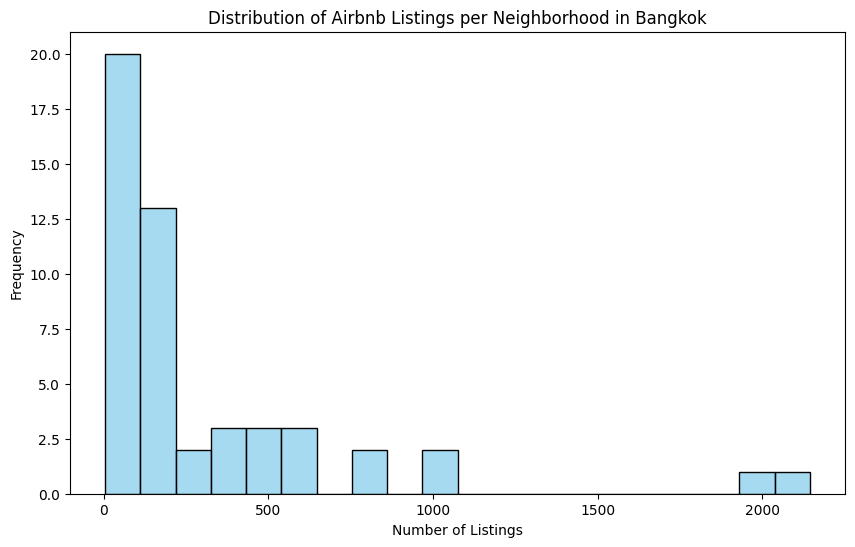

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_by_neighborhood['listing_count'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Airbnb Listings per Neighborhood in Bangkok')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.show()

- Right-Skewed Pattern: The histogram reveals a right-skewed distribution, with the majority of neighborhoods having fewer than 500 listings. This points to a prevalence of smaller-scale Airbnb activity across much of the city.

- Outliers: A handful of neighborhoods stand out with exceptionally high listing counts, highlighting a clear concentration of Airbnb activity in specific, high-demand areas.

### Recommendations for Maximizing Bangkok’s Airbnb Potential 🏠
- Marketing Lead

1. Promote High-Demand Areas:

        Focus marketing campaigns on neighborhoods with high listing density, such as Vadhana and Khlong Toei, to attract more travelers to these areas.
        Use targeted promotions (e.g., local attractions, events) to highlight the appeal of these popular neighborhoods.

2. Increase Traveler Awareness of Underserved Areas:

        Highlight unique experiences in neighborhoods like Bang Bon and Nong Khaem through storytelling campaigns to attract adventurous travelers and expand demand.

- Business Development Lead
        
1. Expand Host Supply in Underserved Neighborhoods:

        Provide incentives (e.g., reduced fees, promotional boosts) for hosts to list properties in areas with fewer than 10 listings.
        Collaborate with local tourism boards to identify growth opportunities in these regions.

2. Optimize Inventory in Central Neighborhoods:

        Work with existing hosts in high-demand areas like Vadhana to increase the variety of listings (e.g., add Hotel Rooms or Shared Rooms to complement Entire Home/Apts).

## 2. Price Dynamics

In [45]:
room_type_stats = df_cleaned.groupby('room_type')['price']
print("Price by Room Type:")
display(room_type_stats.describe())

Price by Room Type:


count         mean          std    min     25%     50%  \
room_type                                                                  
Entire home/apt  8649.0  2116.639519  1596.888468  500.0  1004.0  1532.0   
Hotel room        643.0  2338.689580  1829.791465  500.0   998.0  1700.0   
Private room     5747.0  1835.401079  1604.240157  500.0   800.0  1212.0   
Shared room       521.0   841.274088  1010.634419  500.0   500.0   500.0   

                    75%     max  
room_type                        
Entire home/apt  2580.0  6768.2  
Hotel room       3170.0  6768.2  
Private room     2091.0  6768.2  
Shared room       650.0  6768.2

1. Correlation Analysis
- Objective

    To measure the strength and direction of the linear relationship between price and continuous variables such as:

        availability_365: Number of days the listing is available in a year.
        reviews_per_month: Number of reviews received per month.

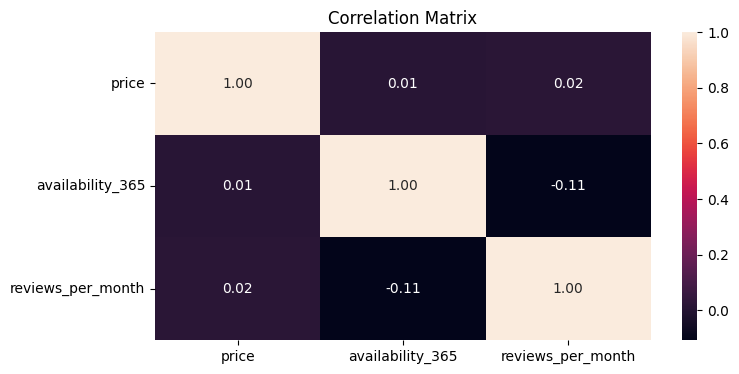

In [46]:
df_continous = df_cleaned[['price', 'availability_365', 'reviews_per_month']]
corr_matrix = df_continous.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Weak Correlations between price and:
- Availability (availability_365): 0.01
- Reviews Per Month (reviews_per_month): 0.02

Pricing is not strongly driven by availability or review activity.
Other factors like room type, location, or listing features play a more significant role.

In [47]:
# Saphiro Wilk Test
statistic, p_value = stats.shapiro(df_cleaned['price'])

# Test Result
alpha = 0.05
print("Shapiro-Wilk Test for Normality:")
print("Statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("The Distribution is normal")
else:
    print("The Distribution is not normal")

Shapiro-Wilk Test for Normality:
Statistic: 0.7761439489570151
p-value: 2.004568770262732e-89
The Distribution is not normal


Because the Data is not normally distributed (skewed), the mean can be heavily influenced by outliers or extreme values. The median, on the other hand, is more robust and represents the central tendency of the data without being affected by outliers, hence the Kruskal Wallis test is used.

- Null Hypothesis (H₀): All groups have the same median.
- Alternative Hypothesis (H₁): At least one group has a significantly different median.

In [48]:
kruskal_room_type = stats.kruskal(
    df_cleaned[df_cleaned['room_type'] == 'Entire home/apt']['price'],
    df_cleaned[df_cleaned['room_type'] == 'Private room']['price'],
    df_cleaned[df_cleaned['room_type'] == 'Shared room']['price'],
    df_cleaned[df_cleaned['room_type'] == 'Hotel room']['price']
)
print("Kruskal-Wallis Test for Room Type and Price:")
print(kruskal_room_type)

Kruskal-Wallis Test for Room Type and Price:
KruskalResult(statistic=np.float64(1158.0011761603885), pvalue=np.float64(9.493113934144073e-251))


P-value < 0.05, the null hypothesis is rejected. Room type has a statistically significant effect on prices.

In [49]:
# Average Price by Neighborhood
neighborhood_price = df_cleaned.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# ANOVA for Neighborhoods
top_neighborhoods = df_cleaned[df_cleaned['neighbourhood'].isin(neighborhood_price.index[:10])]
kruskal_neighborhood = stats.kruskal(*[top_neighborhoods[top_neighborhoods['neighbourhood'] == n]['price'] 
                                for n in top_neighborhoods['neighbourhood'].unique()])
print("Kruskal-Wallis for Price Differences by Neighborhood:")
print(kruskal_neighborhood)

Kruskal-Wallis for Price Differences by Neighborhood:
KruskalResult(statistic=np.float64(64.34524653641307), pvalue=np.float64(1.9340525925804333e-10))


P-value < 0.05, the null hypothesis is rejected.  Neighborhoods has a statistically significant effect on prices.

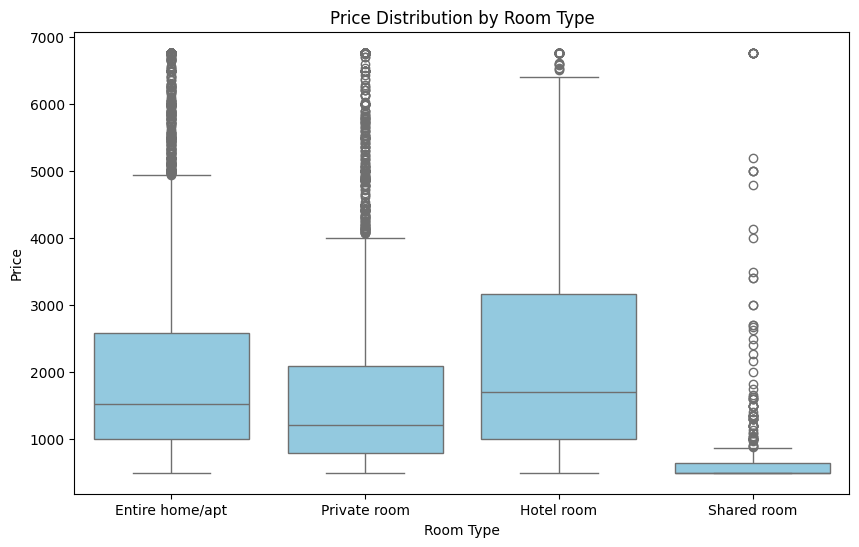

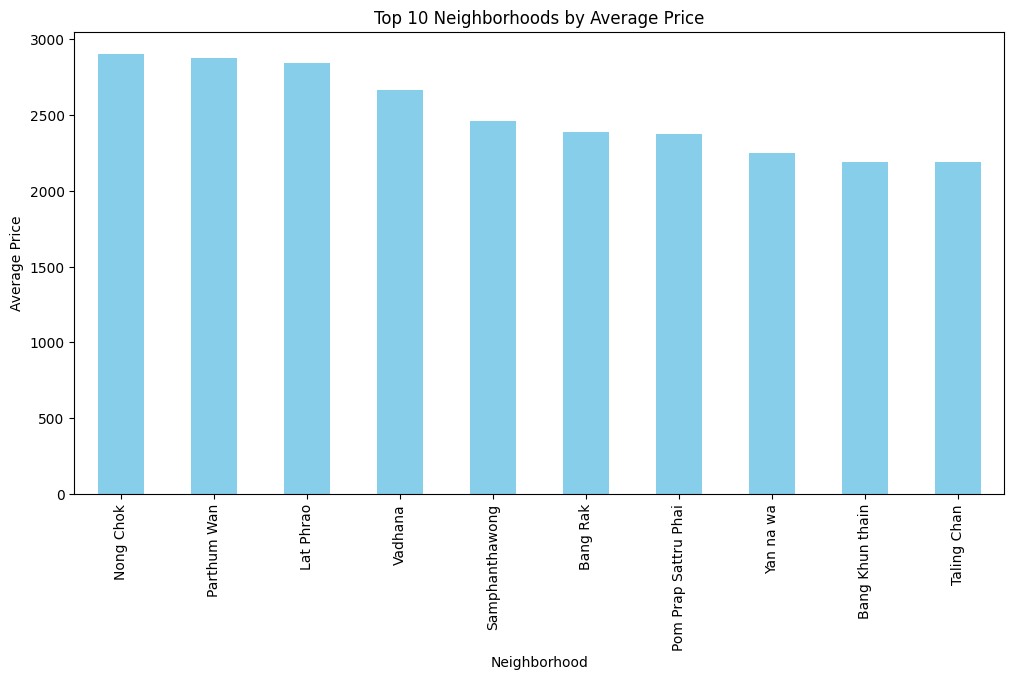

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='room_type', y='price', color="skyblue")
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Bar Plot for Average Price by Neighborhood
neighborhood_price.head(10).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Neighborhoods by Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()

Findings:
1. Significant differences in median prices across room types, supported by the Kruskal-Wallis test (p-value < 0.05).
Entire Home/Apts and Hotel Rooms command the highest median prices, while Shared Rooms cater to budget-conscious travelers.

        Room type determines the level of privacy, amenities, and target audience (e.g., solo travelers for Shared Rooms, families for Entire Home/Apts).
        Travelers often select listings based on the experience they seek, which directly influences pricing.

2. Significant differences in median prices between neighborhoods, confirmed by the Kruskal-Wallis test (p-value < 0.05).
Expensive neighborhoods like Lat Phrao and Pathum Wan command higher prices, likely due to proximity to attractions, transportation hubs, and demand.

        Neighborhoods closer to city centers or tourist hotspots tend to attract more travelers and justify higher prices.
        Infrastructure, safety, and local attractions play a critical role in determining the price premium for a location.

Conclusion
The analysis highlights that room type and neighborhood are the two most influential factors in determining Airbnb prices. These factors strongly shape traveler expectations and willingness to pay, as evidenced by statistically significant differences in their price distributions.

Recommendations
- For Marketing Lead:

        Create campaigns targeting travelers willing to pay for centrality and luxury.
        Use comparative messaging to highlight value-for-money opportunities in these areas.

- For Business Development Lead:

        1. Guide Hosts on Dynamic Pricing:
        - Provide neighborhood-specific pricing tools to help hosts set competitive rates based on traveler demand and market trends.
        2. Promote Underserved Neighborhoods:
        - Increase supply in suburban areas by collaborating with developers or encouraging existing hosts to list additional properties at competitive prices.

## 3. Room Type Preference (Host vs Travelers)

In [51]:
room_type_count = df_cleaned['room_type'].value_counts()
display(room_type_count)

room_type
Entire home/apt    8649
Private room       5747
Hotel room          643
Shared room         521
Name: count, dtype: int64

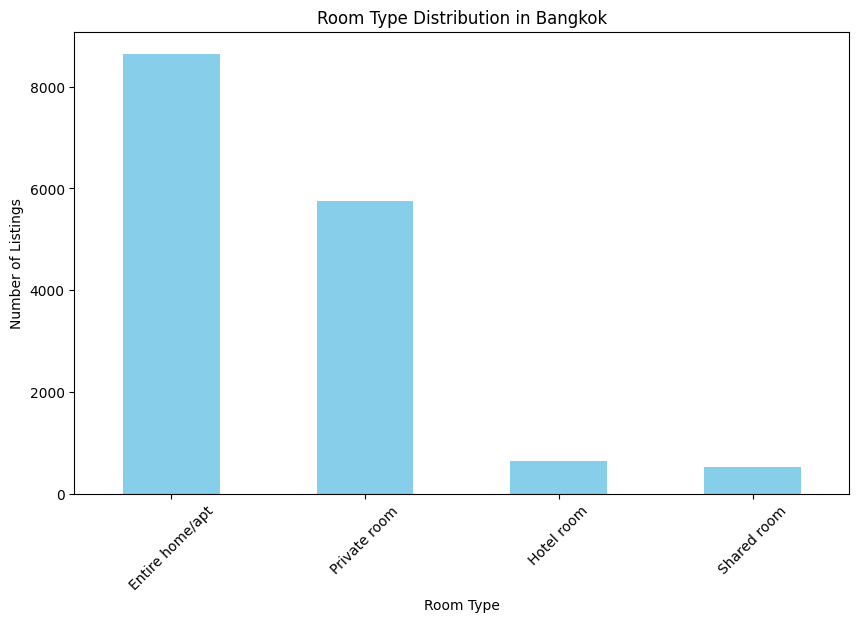

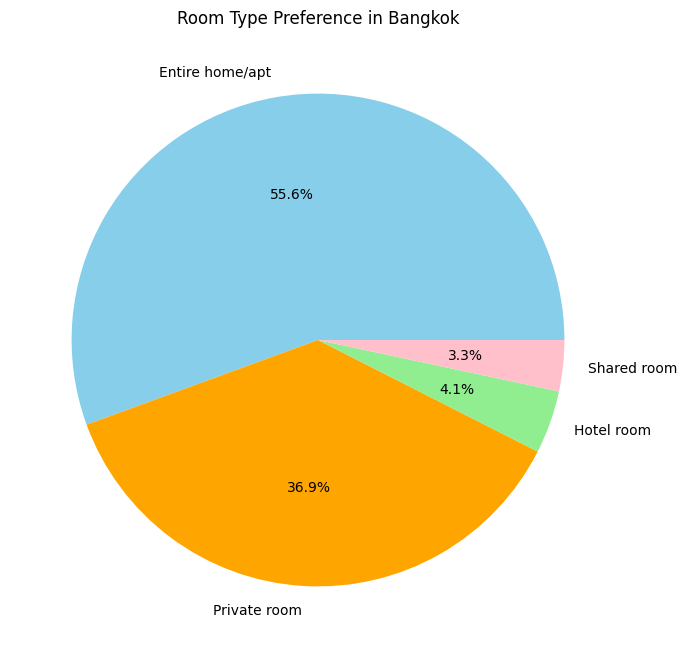

In [52]:
# Bar chart for room type distribution
plt.figure(figsize=(10, 6))
room_type_count.plot(kind='bar', color='skyblue')
plt.title('Room Type Distribution in Bangkok')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Pie chart for room type distribution
plt.figure(figsize=(8, 8))
room_type_count.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen', 'pink'])
plt.title('Room Type Preference in Bangkok')
plt.ylabel('')
plt.show()

- Entire Home/Apt has the highest host count with 8,649 listings.
- Private Room is the second most common at 5,747 listings.
- Hotel Rooms (643 listings) and Shared Rooms (521 listings) make up a smaller portion of the supply.

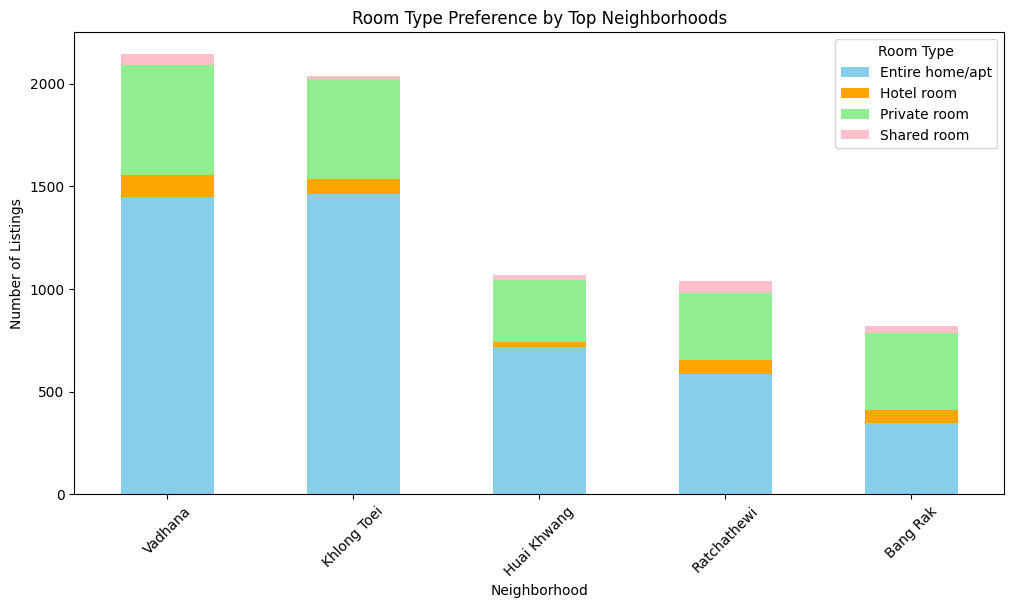

In [53]:
# Top neighborhoods by listings
topfive_nbh = df_cleaned['neighbourhood'].value_counts().head(5).index
topfive_nbh_data = df_cleaned[df_cleaned['neighbourhood'].isin(topfive_nbh)]

room_type_by_neighborhood = topfive_nbh_data.groupby(['neighbourhood', 'room_type']).size().unstack()
room_type_by_neighborhood['Total'] = room_type_by_neighborhood.sum(axis=1)
room_type_by_neighborhood = room_type_by_neighborhood.sort_values(by='Total', ascending=False).drop(columns=['Total'])

room_type_by_neighborhood.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange', 'lightgreen', 'pink'])
plt.title('Room Type Preference by Top Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')
plt.xticks(rotation=45)
plt.show()

In [54]:
# Host Preference: Count of listings by room type
host_preference = df_cleaned['room_type'].value_counts()

# Traveler Preference: Sum of reviews and reviews per month by room type
traveler_preference = df_cleaned.groupby('room_type')[['number_of_reviews', 'reviews_per_month']].sum()

preference_comparison = traveler_preference.merge(host_preference.rename('host_count'), left_index=True, right_index=True)
preference_comparison['reviews_per_listing'] = preference_comparison['number_of_reviews'] / preference_comparison['host_count']
preference_comparison['reviews_per_month_per_listing'] = preference_comparison['reviews_per_month'] / preference_comparison['host_count']

display(preference_comparison)

number_of_reviews  reviews_per_month  host_count  \
room_type                                                           
Entire home/apt             152138            5291.20        8649   
Hotel room                    8452             182.52         643   
Private room                 40775            1441.40        5747   
Shared room                   2524              57.71         521   

                 reviews_per_listing  reviews_per_month_per_listing  
room_type                                                            
Entire home/apt            17.590242                       0.611770  
Hotel room                 13.144635                       0.283857  
Private room                7.095006                       0.250809  
Shared room                 4.844530                       0.110768

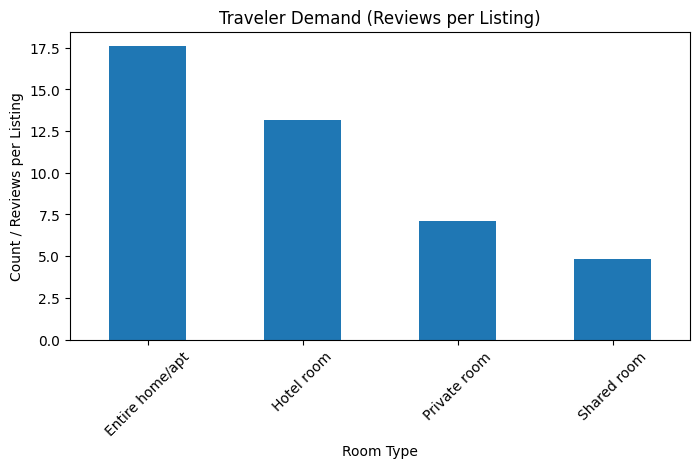

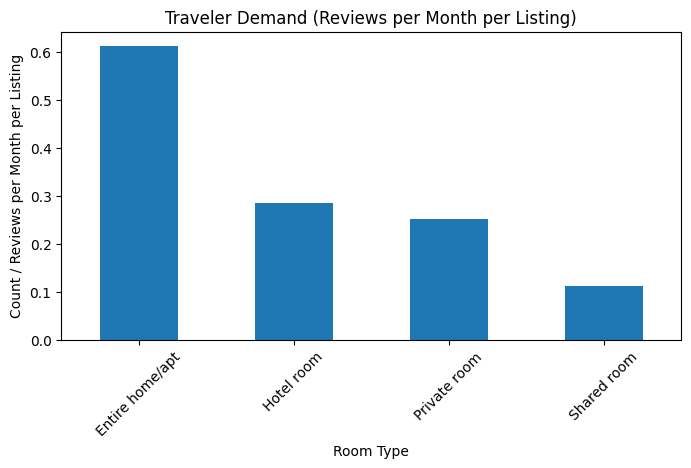

In [55]:
# Bar chart comparing host count and traveler reviews per listing
preference_comparison['reviews_per_listing'].plot(kind='bar', figsize=(8, 4))
plt.title('Traveler Demand (Reviews per Listing)')
plt.xlabel('Room Type')
plt.ylabel('Count / Reviews per Listing')
plt.xticks(rotation=45)
plt.show()


# Bar chart comparing host count and traveler reviews per month per listing
preference_comparison['reviews_per_month_per_listing'].plot(kind='bar', figsize=(8, 4))
plt.title('Traveler Demand (Reviews per Month per Listing)')
plt.xlabel('Room Type')
plt.ylabel('Count / Reviews per Month per Listing')
plt.xticks(rotation=45)
plt.show()

Comparing them to the host listing count: 
- Hosts’ preferences align well with traveler demand for Entire Home/Apt, as it dominates both supply and demand.
- Hotel Rooms, despite low host count, exhibit high reviews per listing, suggesting a consistent and niche traveler base.
- Entire Home/Apt not only attracts the most reviews per listing but also shows consistent monthly engagement, reinforcing its popularity among travelers.
- Shared Rooms have the lowest engagement, possibly due to limited traveler interest in this room type.

Key Takeaways:
1. Entire Home/Apt:

        Dominates both host preference and traveler demand, making it the most popular and profitable room type.
        Hosts should continue focusing on this category, particularly in high-demand neighborhoods.

2. Hotel Rooms:

        Despite low supply, it has strong demand relative to its availability.
        There’s potential for growth in this category, especially in high-traffic areas.

3. Private Rooms:

        Moderate demand compared to supply. Optimizing pricing or enhancing listing quality may boost engagement.

4. Shared Rooms:

        Both host supply and traveler demand are low, indicating limited interest in this room type.

Recommendations:
1. For marketing:

        Provide a campaign targeting for future hosts to have a Shared Rooms listings by Offering to reduced service fees or promotional boosts and provide visibility boosts
        Partner up with hotels across the city to lift the supply on Hotel rooms


2. For business lead:

        Advise hosts with low-performing Shared Rooms to improve their listings (e.g., better photos, amenities).
        Provide tools and resources to make managing Shared Rooms easier.


## 4. Neighborhood Analysis of Minimum Stays

In [56]:
def categorize_stay(min_nights):
    if min_nights <= 6:
        return 'Daily Stay'
    elif 7 <= min_nights <= 29:
        return 'Weekly Stay'
    else:
        return 'Monthly Stay'

# Apply categorization
df_cleaned['stay_type'] = df_cleaned['minimum_nights'].apply(categorize_stay)

In [57]:
# Aggregate data by neighborhood and stay type
stay_type_by_neighborhood = df_cleaned.groupby(['neighbourhood', 'stay_type']).size().unstack(fill_value=0)

# Add total listings per neighborhood and calculate proportions
stay_type_by_neighborhood['Total'] = stay_type_by_neighborhood.sum(axis=1)
stay_type_by_neighborhood['Daily Stay (%)'] = (stay_type_by_neighborhood['Daily Stay'] / stay_type_by_neighborhood['Total']) * 100
stay_type_by_neighborhood['Weekly Stay (%)'] = (stay_type_by_neighborhood['Weekly Stay'] / stay_type_by_neighborhood['Total']) * 100
stay_type_by_neighborhood['Monthly Stay (%)'] = (stay_type_by_neighborhood['Monthly Stay'] / stay_type_by_neighborhood['Total']) * 100

display(stay_type_by_neighborhood)

stay_type             Daily Stay  Monthly Stay  Weekly Stay  Total  \
neighbourhood                                                        
Bang Bon                       4             0            1      5   
Bang Kapi                    189            39           31    259   
Bang Khae                     80             6            6     92   
Bang Khen                    103             7            6    116   
Bang Kho laen                 80            29           31    140   
Bang Khun thain               17             3            1     21   
Bang Na                      261            91          103    455   
Bang Phlat                   116            75           20    211   
Bang Rak                     616           129           74    819   
Bang Sue                     130            40           77    247   
Bangkok Noi                  132            12            8    152   
Bangkok Yai                   76             6            8     90   
Bueng Kum                     46             5            3     54   
Chatu Chak                   368           102           75    545   
Chom Thong                    48            15           11     74   
Din Daeng                    344            65           33    442   
Don Mueang                   151            11            4    166   
Dusit                         85             3            2     90   
Huai Khwang                  713           173          181   1067   
Khan Na Yao                   42             9            4     55   
Khlong Sam Wa                 23             5            4     32   
Khlong San                   215            84           58    357   
Khlong Toei                 1478           280          278   2036   
Lak Si                       105            13            8    126   
Lat Krabang                  137            11            0    148   
Lat Phrao                     49             4            3     56   
Min Buri                      53             8            1     62   
Nong Chok                     14             0            0     14   
Nong Khaem                     9             0            0      9   
Parthum Wan                  308            62           83    453   
Phasi Charoen                115            18           22    155   
Phaya Thai                   341            41           39    421   
Phra Khanong                 372            91           88    551   
Phra Nakhon                  610             2            5    617   
Pom Prap Sattru Phai         120             2            1    123   
Pra Wet                      111            17           28    156   
Rat Burana                    24            13           16     53   
Ratchathewi                  721           147          172   1040   
Sai Mai                       36             3            1     40   
Samphanthawong               114             0            0    114   
Saphan Sung                   43             0            2     45   
Sathon                       608           112           46    766   
Suanluang                    262            45           72    379   
Taling Chan                   48             2            0     50   
Thawi Watthana                10             1            1     12   
Thon buri                    103            29           49    181   
Thung khru                    19             1            0     20   
Vadhana                     1454           344          346   2144   
Wang Thong Lang               79            13            8    100   
Yan na wa                    156            29           15    200   

stay_type             Daily Stay (%)  Weekly Stay (%)  Monthly Stay (%)  
neighbourhood                                                            
Bang Bon                   80.000000        20.000000          0.000000  
Bang Kapi                  72.972973        11.969112         15.057915  
Bang Khae                  86.956522         6.521739          

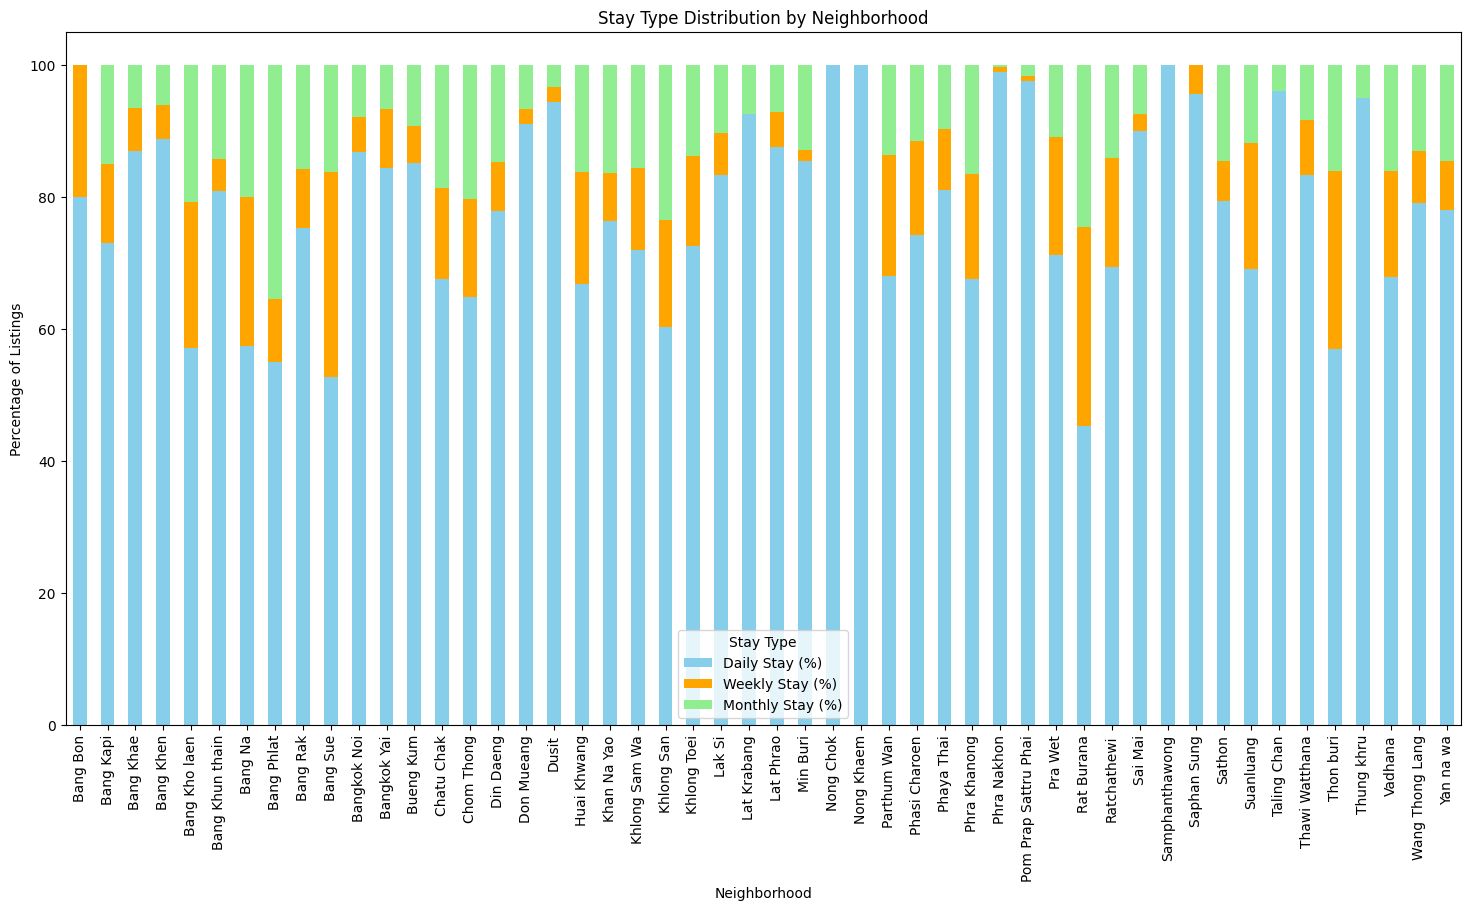

In [58]:
stay_type_by_neighborhood[['Daily Stay (%)', 'Weekly Stay (%)', 'Monthly Stay (%)']].plot(
    kind='bar', stacked=True, figsize=(18, 9), color=['skyblue', 'orange', 'lightgreen'],
)
plt.title('Stay Type Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage of Listings')
plt.legend(title='Stay Type')
plt.show()

- Daily Stays dominate across neighborhoods, reflecting high demand for short-term stays, likely driven by tourism and business travel.
- Weekly Stays and Monthly Stays are more prevalent in select neighborhoods, suggesting they cater to specific traveler needs, such as long-term work assignments or relocations.

Recommendations:
1. For Business:

        Allow hosts to collect payments in monthly installments for long-term bookings.
        Reduce perceived financial risk for hosts by providing a cancellation buffer for last-minute changes or cancellations by guests.


2. For Marketing:

        Target Audience Segmentations:
                Remote workers: Emphasize work-friendly features and affordable monthly rates.
                Students: Partner with universities to promote long-term rentals for international or out-of-city students.


In [60]:
df_cleaned.describe()

id       host_id      latitude     longitude         price  \
count  1.556000e+04  1.556000e+04  15560.000000  15560.000000  15560.000000   
mean   1.574203e+17  1.533440e+08     13.745190    100.559931   1979.238201   
std    2.941214e+17  1.326181e+08      0.043254      0.051225   1614.599483   
min    2.793400e+04  5.892000e+04     13.527300    100.329550    500.000000   
25%    2.093237e+07  3.850666e+07     13.720120    100.529628    900.000000   
50%    3.476557e+07  1.192033e+08     13.738425    100.561643   1414.000000   
75%    5.255482e+07  2.403435e+08     13.759490    100.585363   2429.000000   
max    7.908162e+17  4.926659e+08     13.953540    100.923440   6768.200000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    15560.000000       15560.000000       15560.000000   
mean        14.821465          13.103406           0.448125   
std         45.080301          23.479417           0.670680   
min          1.000000           0.000000           0.000000   
25%          1.000000           0.000000           0.000000   
50%          1.000000           2.000000           0.080000   
75%          7.000000          13.000000           0.660000   
max        365.000000          87.000000           2.310000   

       calculated_host_listings_count  availability_365  \
count                    15560.000000      15560.000000   
mean                        10.744666        243.883290   
std                         15.807438        125.366861   
min                          1.000000          0.000000   
25%                          1.000000        137.000000   
50%                          4.000000        306.500000   
75%                         12.000000        360.000000   
max                         99.000000        365.000000   

       number_of_reviews_ltm  occupancy_ratio  
count           15560.000000     15560.000000  
mean                3.427828         0.331827  
std                 8.904197         0.343471  
min                 0.000000         0.000000  
25%                 0.000000         0.013699  
50%                 0.000000         0.160274  
75%                 3.000000         0.624658  
max               325.000000         1.000000

# SUMMARY

### 1. Airbnb Listing Number and Location Distribution Analysis

Bangkok hosts 15,854 active Airbnb listings, with an uneven distribution across neighborhoods. High-demand areas like Vadhana (2,144 listings) and Khlong Toei (2,036 listings) dominate the market due to their central location and popularity among tourists, while underserved neighborhoods like Bang Bon and Nong Khaem feature fewer than 10 listings, reflecting potential growth opportunities. Airbnb can encourage host expansion in underserved areas and run campaigns to attract more travelers to less saturated neighborhoods.

### 2. Factors Affecting Airbnb Listing Prices
The primary factors influencing Airbnb prices are room type and neighborhood. Entire Home/Apts and Hotel Rooms command the highest prices, averaging 2,355 THB and 2,561 THB, respectively, while Shared Rooms average only 893 THB. Neighborhoods like Lat Phrao and Pathum Wan are among the most expensive, with average prices exceeding 3,500 THB, driven by their centrality and high-end accommodations. Airbnb should guide hosts on dynamic pricing strategies tailored to room types and neighborhoods to maximize earnings while maintaining competitiveness.

### 3. Room Type Preference
Entire Home/Apts dominate the supply side, accounting for 55.6% of listings, followed by Private Rooms at 36.9%. On the demand side, Entire Home/Apts and Hotel Rooms show the highest traveler engagement, with 21.23 and 16.89 reviews per listing, respectively, while Shared Rooms lag behind with only 5.15 reviews per listing. Airbnb can encourage hosts to increase Hotel Room listings in high-demand areas and promote Shared Rooms to budget-conscious travelers through targeted marketing campaigns.

### 4. Neighborhood Analysis of Minimum Stays
Daily Stays dominate across most neighborhoods, comprising 57% to 100% of listings, especially in tourist-heavy areas like Samphanthawong and Bangkok Noi. In contrast, Monthly Stays are more prevalent in suburban neighborhoods like Bang Phlat (36%) and Rat Burana (25%), catering to long-term renters such as remote workers and expats. Airbnb can provide insights to hosts on tailoring minimum stay policies based on neighborhood trends, promoting flexibility in Daily Stay-dominant areas while encouraging long-term rental options in Monthly Stay-friendly neighborhoods.

### Platform-Wide Recommendations for Airbnb
Airbnb should develop tools to guide hosts on pricing, stay policies, and room type selection based on traveler preferences and neighborhood demand. Features tailored to long-term rentals, such as installment payment options and enhanced booking guarantees, can attract more Monthly Stay travelers. Marketing campaigns should target both high-demand areas like Vadhana and emerging neighborhoods like Bang Phlat, emphasizing their unique appeal to different traveler types. Lastly, Airbnb should offer host training to improve listing optimization and align supply with traveler demand effectively.